# Risk Analysis of Covid19 Virus
As the outbreak of coronavirus disease 2019 (COVID-19) progresses, epidemiological data are needed to guide situational awareness and intervention strategies. The enormous impact of the COVID-19 pandemic is obvious. What many still haven’t realized, however, is that the impact on ongoing data science production setups has been dramatic, too. Artificial Intelligence is actively used in identifying high risk patients at an earlier stage and therefore helps to control the spread of the infection in real-time. This becomes particularly important at this time of crisis because real time monitoring is the best option for people to self-isolate and mitigate the spread of the virus.

Objective: This is an open-research project that a healthcare institute will use to determine the risk factor of second-level contacts traced for a COVID19 Positive patient. This study will also lead to deciding which all factors should be considered for a healthcare institute to open a dedicated testing-quarantine labs and/or predict the possibility of a zone turning into a hotspot.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Collection:Get the data from APIs

Data has been collected by Tanmoy Mukherjee (https://www.kaggle.com/tanmoyx).Dataset has been taken from kaggle with URL as: https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv .
Data is being collected by the Mexican goverment, it contains a large number of anonymised patient-related  information such as pre-existing conditions, gender, age, symptom date and entry date. The data contains patient information around the world.

Feature Set:
he data set contains 993,197 records, the data dictionary is provided as below:

1. id: The identification number of the patient.

2. sex: Identify gender of the patient, 1 as female and 2 as male.

3. patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.

4. entry_date: The date that the patient went to the hospital.

5. date_symptoms: The date that the patient started to show symptoms.

6. date_died: The date that the patient died, "9999-99-99" stands for recovered.

7. intubed: Intubation is a procedure that's used when you can't breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). "1" denotes that the patient used ventilator and "2" denotes that the patient did not, "97" "98" "99" means not specified.

8. pneumonia: Indicates whether the patient already have air sacs inflammation or not "1" for yes, "2" for no, "97" "98" "99" means not specified.

9. age: Specifies the age of the patient.

10. pregnancy: Indicates whether the patient is pregnant or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

11. diabetes: Indicates whether the patient has diabetes or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

12. copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

13. asthma: Indiactes whether the patient has asthma or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

14. inmsupr: Indicates whether the patient is immunosuppressed or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

15. hypertension: Indicates whether the patient has hypertension or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

16. other_disease: Indicates whether the patient has other disease or not, "1" for yes, "2" for no, "97" "98" "99" means not specified.

17. cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, "1" for yes, "2" for no, "97" "98" "99" means not specified.

18. obesity: Indicates whether the patient is obese or not,  "1" for yes, "2" for no, "97" "98" "99" means not specified.

19. renal_chronic: Indicates whether the patient has chronic renal disease or not,  "1" for yes, "2" for no, "97" "98" "99" means not specified.

20. tobacco: Indicates whether if the patient is a tobacco user, "1" for yes, "2" for no, "97" "98" "99" means not specified.

21. contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.

22. covid_res: RESULT Identifies the result of the analysis of the sample reported by the laboratory of the National Network of Epidemiological Surveillance Laboratories (INDRE, LESP and LAVE). ( "1" for positive,"2" for negative, "3" for result is pending.

22. icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), "1" for yes, "2" for no, "97" "98" "99" means not specified.


In [2]:
df=pd.read_csv(r'C:\Users\Sony\Desktop\python\covid19\another dataset\covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

In [3]:
date_fields=['entry_date','date_symptoms']
for dates in date_fields:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

In [4]:
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)

In [6]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]
df.rename(columns={'covid_res':'Test result'},inplace=True)

In [6]:
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

df.iloc[:,-2]=df.iloc[:,-2].replace('Yes','Positive')
df.iloc[:,-2]=df.iloc[:,-2].replace('No','Negative')
df.iloc[:,-2]=df.iloc[:,-2].replace(3,'Results awaited')

In [7]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu
0,2,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,No,Positive,NaN
1,2,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,NaN
2,1,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,No,No,No,No,Yes,No,No,NaN,Positive,No
3,2,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,No
4,1,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,Yes,No,No,No,NaN,Positive,No


In [8]:
df['intubed'].isna().value_counts()

True     444813
False    121789
Name: intubed, dtype: int64

# 2. Exploratory Data Analysis

Text(0.5,1,'Reported intubations \n \n  Ratio=11')

<Figure size 720x576 with 0 Axes>

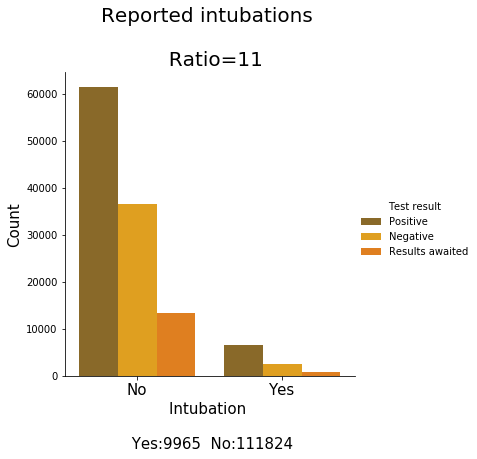

In [12]:
plt.figure(figsize=(10,8))
ax=sns.catplot('intubed',data=df,kind='count',palette='autumn_d',hue='Test result')
plt.xticks(size=15,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[0]),size=15)
plt.ylabel('Count',size=15)
plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[0]/df['intubed'].value_counts()[1])
          ,size=20)

# Intubation test positivity
Through this metric we try to understand what are our chances of being COVID +ve if we are intubated
we can see that for the reported intubed patients, about 65.72 % of the patients are COVID +VE. This basically tells us that intubation is a strong indicator for indicator.

Text(0.5,6.8,'Results \n Test postivity rate: 65.72 %')

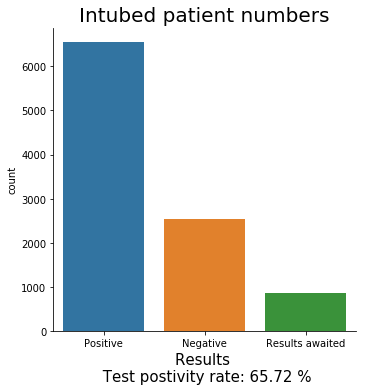

In [10]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('Test result',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['Test result'].value_counts()[0]/df_intubed['Test result'].size),size=15)

# Intubation and fatality rate
Let us try to understand how are the fatality numbers when a patient is intubed.

In [11]:
df_intubed.reset_index(drop=True,inplace=True)
df_intubed['Fatal']=np.nan

i=0
for i in range(len(df_intubed)):
    if df_intubed['date_died'][i]!='Not Applicable':
        df_intubed['Fatal'][i]='Yes'

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sony\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Sony\Anaconda3\lib\site-pa

In [12]:
df_intubed['Fatal'].fillna('No',inplace=True)

C:\Users\Sony\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
df_int_pos=df_intubed[df_intubed['Test result']=='Positive']

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

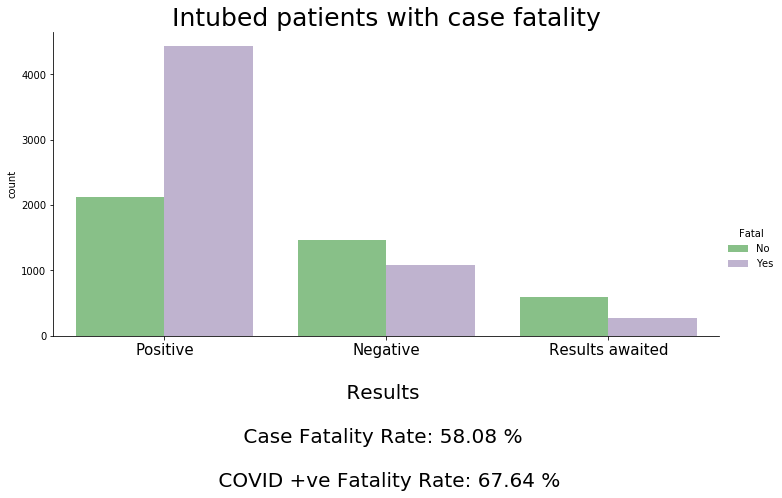

In [14]:
sns.catplot('Test result',kind='count',hue='Fatal',data=df_intubed,palette='Accent',height=5,aspect=2)
plt.title('Intubed patients with case fatality',size=25)

plt.xlabel('\n Results  \n \n Case Fatality Rate: {0:.2f} %  \n \n COVID +ve Fatality Rate: {1:.2f} %'.format(100* df_intubed['Fatal'].value_counts()[0]/df_intubed.shape[0],100 * df_int_pos['Fatal'].value_counts()[0]/df_int_pos.shape[0]),size=20)
plt.xticks(size=15)

# As we can see from the plot above, the case fatality rate is quite high for patients who are already on incubators.

But what's staggering to see is that for patients who are on incubators and are COVID +ve, the case fatality is extremely high when in comparison to non positive cases.

For COVID +ve patients who are also intubed through ventilators, the fatality rate is 67.64 % which is quite high.

In [15]:
df['sex'].replace(1,'Female',inplace=True)
df['sex'].replace(2,'Male',inplace=True)

Text(0.5,1,'Gender distribution')

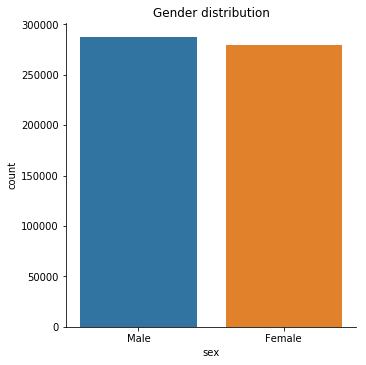

In [16]:
sns.catplot('sex',data=df,kind='count')
plt.title('Gender distribution')

As we can see from the plot above, the data is quite balanced in terms of gender. This is exremely desirable when we are analysing data as it removes bias.

Let us now check how many of these patients are positive and how many of each gender was fatal in nature

In [17]:
df_pos=df[df['Test result']=='Positive']

df_pos.reset_index(drop=True,inplace=True)
df_pos['Fatal']=np.nan

i=0
for i in range(len(df_pos)):
    if df_pos['date_died'][i]!='Not Applicable':
        df_pos['Fatal'][i]='Yes'

df_pos['Fatal']=df_pos['Fatal'].fillna('No')

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Sony\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexe

# Age
Let us see how the ages are distributed and then check the number of positive cases for each age group. For the purpose of better understanding, we shall convert the continuous values of ages into various age bands as shown.

Less than 2 years
2-10 years
10-20 years
20-30 years
30-40 years
40-50 years
50-60 years
60-80 years
Above 80 years

In [18]:
def age_band(age):
    
   
    if age<2:
        return 'Less than 2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

C:\Users\Sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Gender wise age distribution')

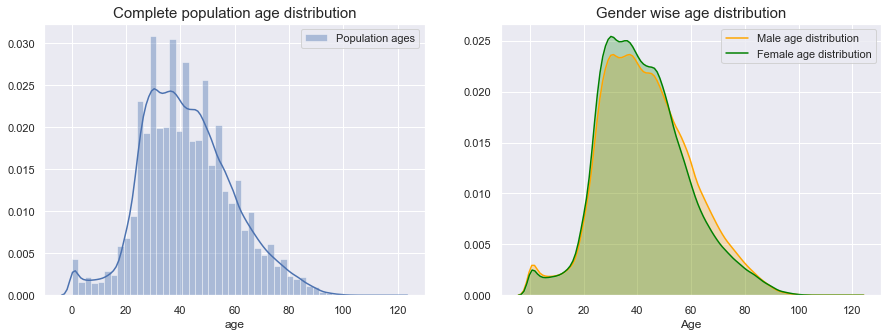

In [19]:
sns.set()
fig1=plt.figure(figsize=(15,5))
ax1=fig1.add_subplot(121)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(122)

df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)

From the above left graph, we can see that we have a bimodal graph with high distribution from 20-60 years. There is also a peak in the lower section of the graph meaning we have high number of infants in our distribution.

On the right, we see that the distribution for both women and men is nearly identical. This is great because it will let us understand the body responses of the sexes with an identical age distribution.

In [20]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,No,Positive,NaN
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,NaN
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,No,No,No,No,Yes,No,No,NaN,Positive,No
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,No
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,Yes,No,No,No,NaN,Positive,No


In [21]:
df['Age band']=df['age'].apply(age_band)
df['Count']=1

In [22]:
df_age_band=df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

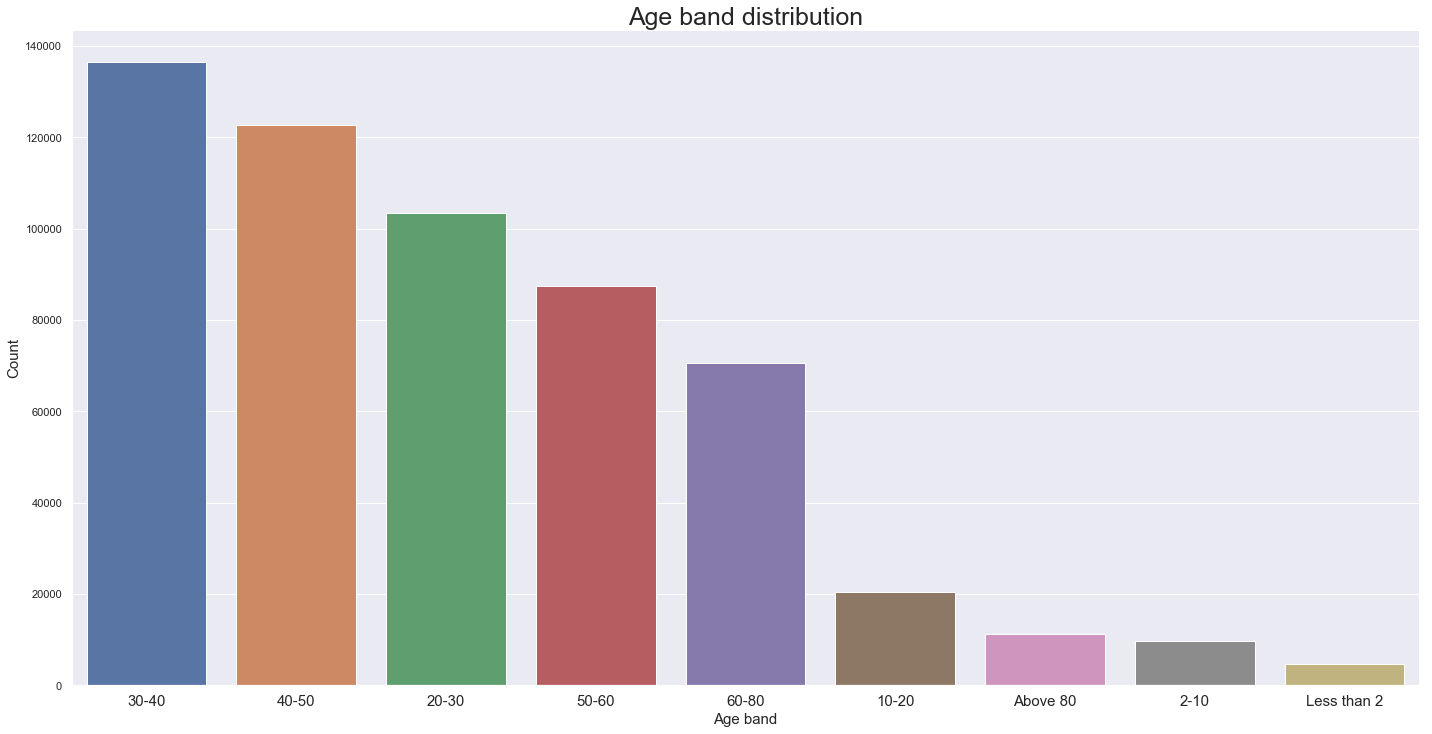

In [23]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)


plt.title('Age band distribution',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

In [24]:
def fatality(fatal):
    if fatal =='Not Applicable':
        return 'No'
    else:
        return 'Yes'

In [25]:
df['Fatal']=df['date_died'].apply(fatality)

Text(0.5,1,'COVID +ve case fatality with respect to age groups')

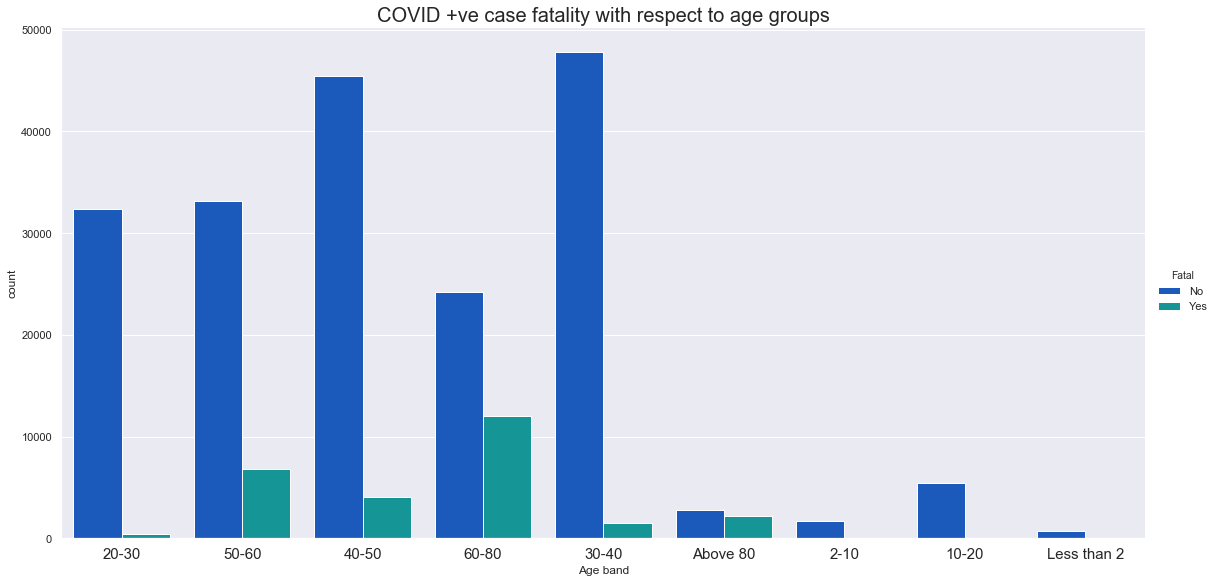

In [26]:
df_pos=df[df['Test result']=='Positive']
sns.catplot('Age band',kind='count',hue='Fatal',data=df_pos,height=8,aspect=2,palette='winter')

plt.xticks(size=15)

plt.title('COVID +ve case fatality with respect to age groups',size=20)

In [27]:
df['delta']=abs(df['entry_date']-df['date_symptoms'])
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu,Age band,Count,Fatal,delta
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,Positive,NaN,20-30,1,No,60 days
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,NaN,Positive,NaN,20-30,1,No,2 days
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,Yes,No,No,NaN,Positive,No,50-60,1,No,152 days
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,NaN,Positive,No,20-30,1,No,170 days
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,No,No,NaN,Positive,No,50-60,1,Yes,0 days


In [28]:
df_pos=df[df['Test result']=='Positive']
df_case_load=df.groupby('entry_date')['Count'].count().reset_index()
df_case_load.sort_values(by='entry_date',inplace=True)
df_case_load.head()

,entry_date,Count
0,2020-01-01,5
1,2020-01-02,8
2,2020-01-03,27
3,2020-01-04,1590
4,2020-01-05,3053


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730., 737760.]),
 <a list of 11 Text xticklabel objects>)

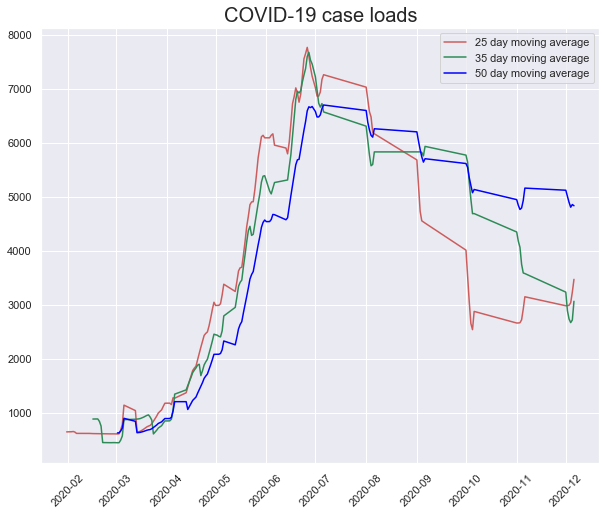

In [29]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(111)

df_case_load['Moving average_25']=df_case_load['Count'].rolling(25).mean()
df_case_load['Moving average_35']=df_case_load['Count'].rolling(35).mean()
df_case_load['Moving average_50']=df_case_load['Count'].rolling(50).mean()

ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_25'],label='25 day moving average',color='indianred')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_35'],label='35 day moving average',color='seagreen')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_50'],label='50 day moving average',color='blue')

plt.legend()
plt.title('COVID-19 case loads',size=20)
plt.xticks(rotation=45)

From the above moving average curve, it seems like the infections spread very quickly since the start of April 2020 at an exponential rate. After the month of July 2020, there seems to be a gradual decrease in number of incoming COVID +ve patients.

Let us now check if the duration between first symptom and hospitalisation date has any relation of fatality.

Since there are very absurd values such where difference between first symptomm and hospitalisation for COVID +ve patients are quite high, we will ignore these. We will consider a max of 5 days delta.

In [30]:
df_pos['delta'].value_counts()[0:8]

0 days    27240
3 days    16211
2 days    15380
4 days    13552
1 days    12374
5 days    10882
6 days     6734
7 days     6406
Name: delta, dtype: int64

In [31]:
df_delta=df_pos[df_pos['delta']<'8 days']

In [32]:
df_delta['Time gap']=df_delta['delta'].astype(str)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_split=df_delta['Time gap'].str.rsplit('00',expand=True)
df_delta['Time gap']=df_split.iloc[:,0]

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


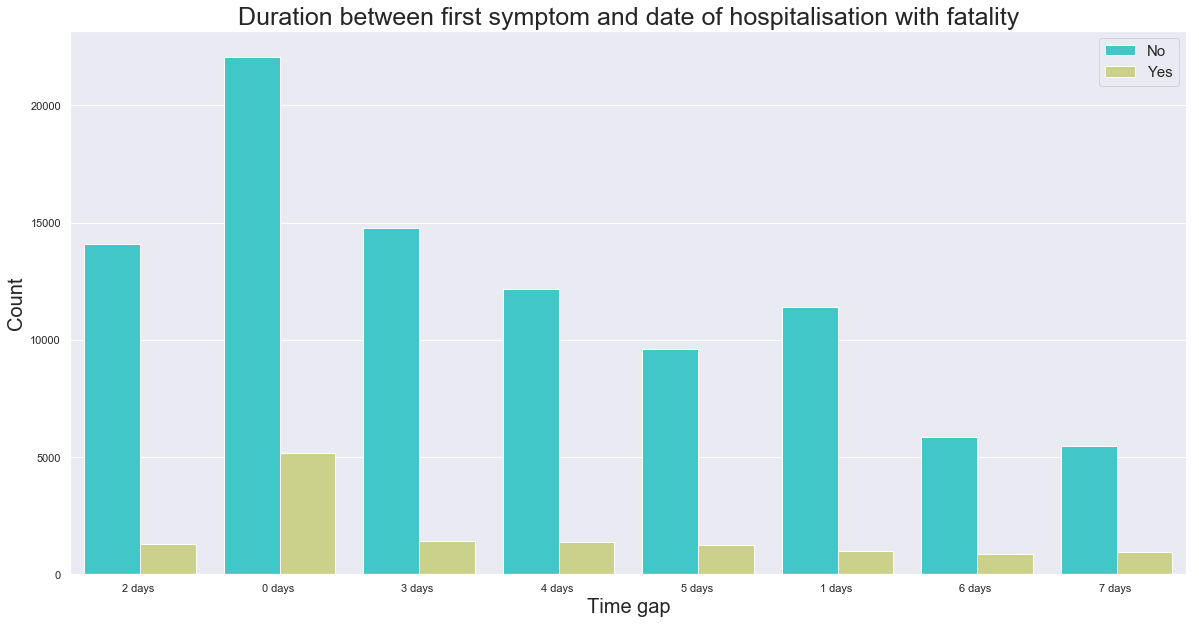

In [34]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

g=sns.countplot('Time gap',hue='Fatal',data=df_delta,palette='rainbow',ax=ax1)
ax1.set_ylabel('Count',size=20)
ax1.set_xlabel('Time gap',size=20)
ax1.set_title('Duration between first symptom and date of hospitalisation with fatality',size=25)
ax1.legend(fontsize=15)

As we can see from the above barplots, even when patients got admitted on the same day as symptoms, there were quite a few fatalities as compared to others. However, the fatality rate for 7 day difference is also quite high. Hence, it is suggested to only visit the hospital after 1-3 days of selfcare as it doesn't significantly effect fatality.This would help to lessen the burden over the healthcare facilities

 Other patient medical conditions
We shall now check how the comorbidities or medical conditions such as pregnancy effects fatality of patients.



# Pneumonia, Cardiovascular, Pregnancy, Obesity
Let us check how the patients with the above medical conditions have fared.

Text(0.5,0,'Fatality rate: 15.70 %')

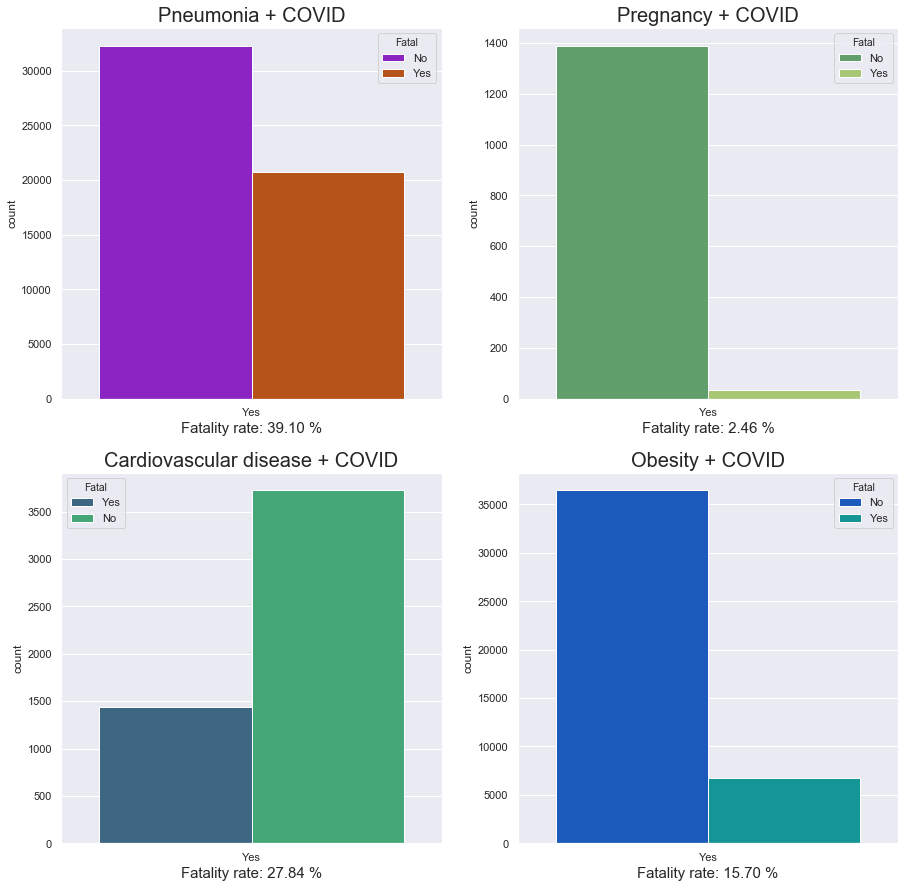

In [35]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='Fatal',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='Fatal',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='Fatal',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='Fatal',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)






ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['Fatal'].value_counts()[1]/df_pneu['Fatal'].shape[0]),size=15)


ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['Fatal'].value_counts()[1]/df_preg['Fatal'].shape[0]),size=15)


ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['Fatal'].value_counts()[1]/df_card['Fatal'].shape[0]),size=15)


ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['Fatal'].value_counts()[1]/df_obes['Fatal'].shape[0]),size=15)

# conclusion
1)Ages above 60 significantly increased the fatalities for COVID +ve patients

2)Male fatality was found to be almost twice that of female fatality

3)Patients with didn't hospitalise themselves even after a week of syptoms and tested positive had reasonable fatalities. If 

4)symptoms are severe, it is best to be hospitalised in 2-3 days since the onset.

5)For patients with comorbities such as pneumonia, obesity or cardiovascular diseases, the fatality is higher.

6)Pregancy doesn't lead to any significant increase in fatality

In [36]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu,Age band,Count,Fatal,delta
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,...,No,No,No,No,Positive,NaN,20-30,1,No,60 days
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,...,No,No,No,NaN,Positive,NaN,20-30,1,No,2 days
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,...,Yes,No,No,NaN,Positive,No,50-60,1,No,152 days
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,...,No,No,No,NaN,Positive,No,20-30,1,No,170 days
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,No,No,NaN,Positive,No,50-60,1,Yes,0 days


In [37]:
df.to_csv('korona19.csv')